In [2]:
#import librairies
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation

In [2]:
#importer votre dataset 
df = pd.read_csv("houseData.csv", sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
#commenter ce dataset  
# les types de variable
# la target 
# pourquoi utiliser Ridge et pas une régression linéaire 
d=df.dtypes
c=df.count()
print('dim : ',df.shape)
print(pd.DataFrame({'dtypes': d.values,'Count_non-NA':c.values},index = d.index))
print('\n\nCe dataset a 21 colonnes qui sont tous numeriques sauf la date\nTous les informations sont disponible (aucune NA) \nLa target est le prix qui doit être expliqué en fontion des autre variables\nOn utilise Ridge et pas une régression linéaire car il ya beaucoup de variables explicatives ce qui peux entrîaner le surapprentissage')

dim :  (21613, 21)
                dtypes  Count_non-NA
id               int64         21613
date            object         21613
price          float64         21613
bedrooms         int64         21613
bathrooms      float64         21613
sqft_living      int64         21613
sqft_lot         int64         21613
floors         float64         21613
waterfront       int64         21613
view             int64         21613
condition        int64         21613
grade            int64         21613
sqft_above       int64         21613
sqft_basement    int64         21613
yr_built         int64         21613
yr_renovated     int64         21613
zipcode          int64         21613
lat            float64         21613
long           float64         21613
sqft_living15    int64         21613
sqft_lot15       int64         21613


Ce dataset a 21 colonnes qui sont tous numeriques sauf la date
Tous les informations sont disponible (aucune NA) 
La target est le prix qui doit être expliqué en fon

In [5]:
#afficher les dimension de votre dataset 
df.shape

(21613, 21)

In [6]:
#enlever les colonnes non pertinentes 
df=df.drop(['id','date','view','waterfront'],axis=1)
df.shape

(21613, 17)

"On remarque que la superficie de la maison, lot, above sont proportionelles au nombre des chambres"


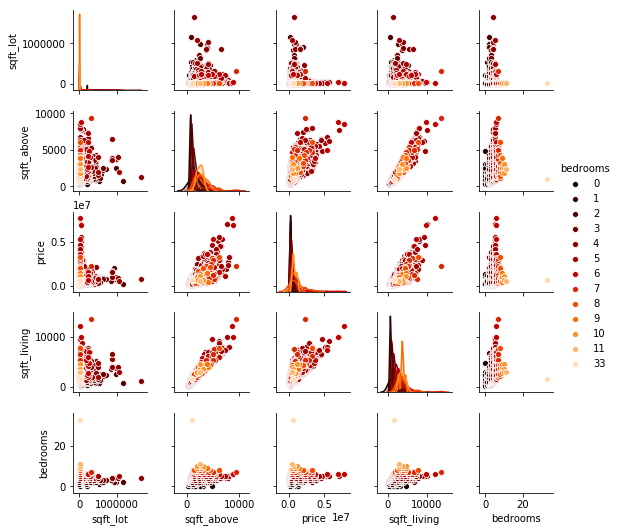

In [7]:
#faire pairplot en mettant en argument bedrooms afin de regarder l'impacte de cette variable  
#que remarquez vous ? 
sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],hue='bedrooms',height=1.5,palette='gist_heat')
print('\"On remarque que la superficie de la maison, lot, above sont proportionelles au nombre des chambres\"')

In [8]:
#extraire les valeurs du prix (votre vecteur cible) dans une nouvelle variable et afficher sa taille 
Y=df['price']
Y=np.asarray(Y)
print('taille du vecteur cible : {}'.format(len(Y)))

taille du vecteur cible : 21613


In [9]:
#supprimer la variable prix dans votre variable 
#pourquoi drop cette variable ?  
del df['price']
print('On supprime la variable prix pour la séparer des variable explicatives')

On supprime la variable prix pour la séparer des variable explicatives


In [10]:
#créer une votre varible de travail X 
#rappel : il faut que ce soit un objet numpy ! 
X=np.asarray(df)

In [11]:
#enregistrer le nom de vos colonnes dans une list 
nom_col=list(df.columns)
nom_col

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [12]:
#créer un 'Lasso estimator'
ll02 = linear_model.Lasso(alpha=0.2,normalize=True)

In [13]:
#fiter sur votre ensemble de donnée 
ll02.fit(X, Y)

C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
#afficher les coefficients 
print(ll02.coef_)

[-4.60371681e+04  4.27861001e+04  2.09910162e+02  1.55917506e-01
  1.10125833e+04  2.91820514e+04  1.01162856e+05 -2.23999188e+01
 -3.02780899e+01 -2.82963779e+03  3.48449523e+01 -4.76908000e+02
  5.55627700e+05 -2.51484241e+05  4.00319113e+01 -3.23987600e-01]


On remarque :
 une grande variations entre les coefficients
 Certains coefficients sont enormes
 Tous les coefficient sont non null  
 la variable 'lat' a plus d'impact sur le prix par rapport aux autres variables


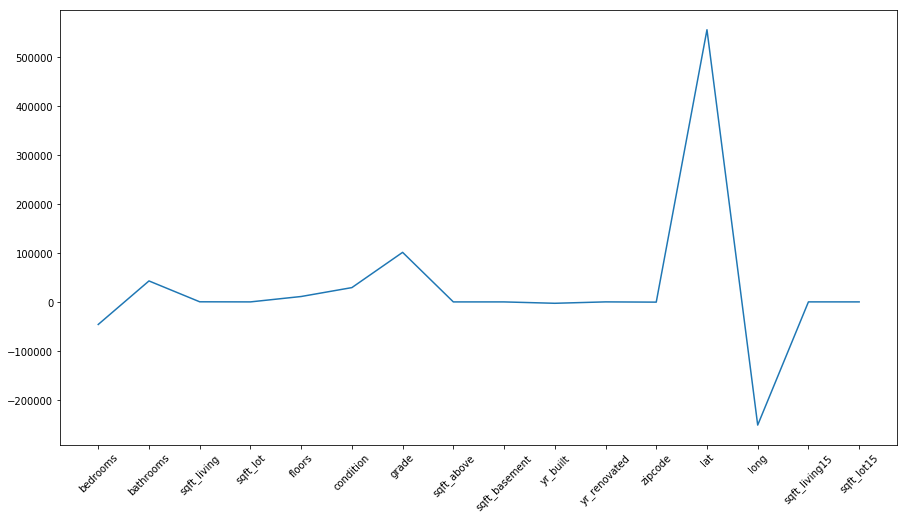

In [15]:
#ploter les coefficients avec les bon noms
#que remarquez vous ? 
plt.figure(figsize=(15,8))
plt.plot(nom_col,ll02.coef_)
plt.xticks(rotation = 45)
print("On remarque :\n une grande variations entre les coefficients\n Certains coefficients sont enormes\n Tous les coefficient sont non null  \n la variable \'lat\' a plus d'impact sur le prix par rapport aux autres variables")

In [16]:
#essayer lasso avec un alpha = 100 et afficher les coefs
#que remarquez vous ? 
ll100 = linear_model.Lasso(alpha=100,normalize=True)
ll100.fit(X, Y)
print(ll100.coef_)
print('\nOn remarque que la valeur absolut des coefficients a dimunié par rapport au cas d\'alpha=0.2 et que certains coefficients sont presque nulls' )

[-2.21651222e+03  3.76966686e+03  1.70151388e+02  0.00000000e+00
  0.00000000e+00  1.01307729e+04  1.02366456e+05  0.00000000e+00
  0.00000000e+00 -1.94583213e+03  1.53104933e+01 -0.00000000e+00
  4.70758627e+05 -7.68871412e+04  2.19537362e+01 -0.00000000e+00]

On remarque que la valeur absolut des coefficients a dimunié par rapport au cas d'alpha=0.2 et que certains coefficients sont presque nulls


L'allure de la courbe reste le même


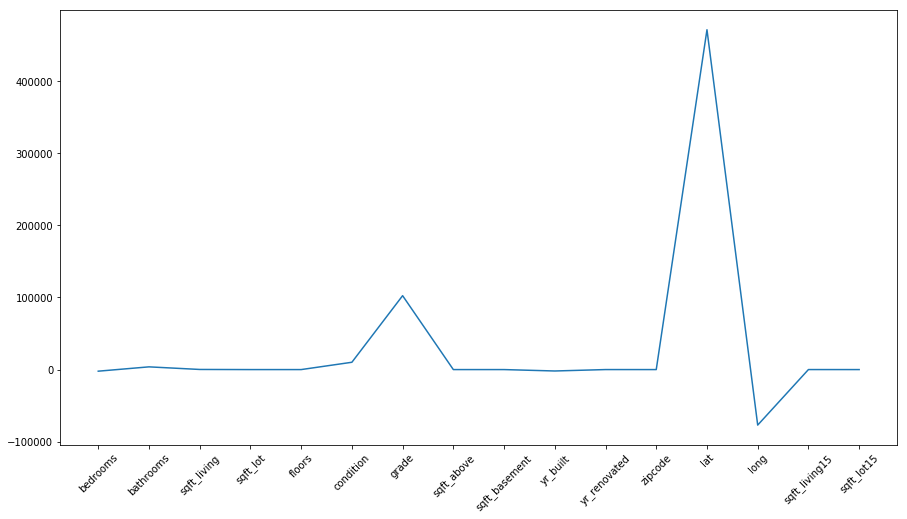

In [17]:
#afficher la courbe 
plt.figure(figsize=(15,8))
plt.plot(nom_col,ll100.coef_)
plt.xticks(rotation = 45)
print('L\'allure de la courbe reste le même')

In [18]:
#pareil avec un alpha = 1000 et afficher les coefs
#que remarquez vous cette fois ci? 
ll1000 = linear_model.Lasso(alpha=1000,normalize=True)
ll1000.fit(X, Y)
print(ll1000.coef_)
print('\nEn augmentant le parametre alpha, le nombre de variables explicatives se reduit à 2 : sqft_living et grade \nLa variable \'lat\' n\' est plus importante pour notre modéle' )

[    0.             0.            93.61923199     0.
     0.             0.         27594.4045107      0.
     0.            -0.             0.             0.
     0.            -0.             0.             0.        ]

En augmentant le parametre alpha, le nombre de variables explicatives se reduit à 2 : sqft_living et grade 
La variable 'lat' n' est plus importante pour notre modéle


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

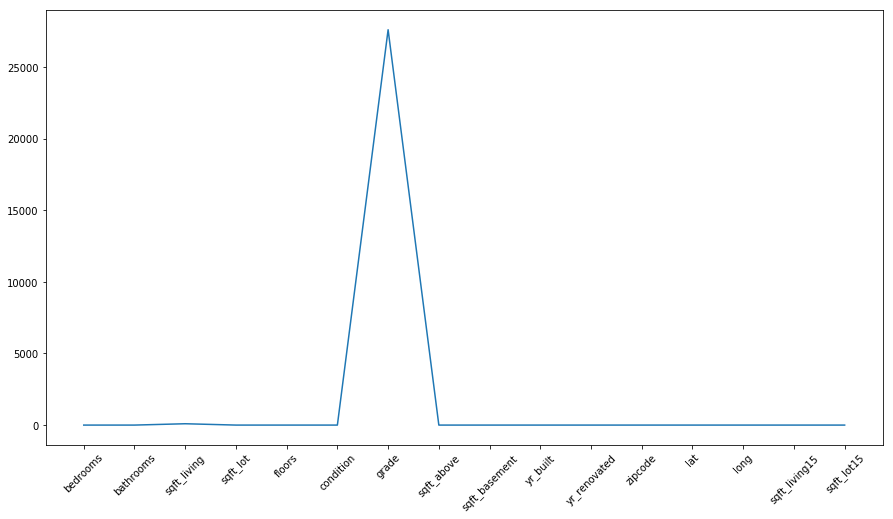

In [19]:
#afficher la courbe 
plt.figure(figsize=(15,8))
plt.plot(nom_col,ll1000.coef_)
plt.xticks(rotation = 45)

## La cross validation 

**Rechercher ce qu'est une cross-validation et faite appliquer la sur votre dataset, afficher votre score moyen pour 5 itérations**

In [20]:
#afficher votre tableau de cross validation ainsi que la moyenne 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ll02, X, Y, cv=5)
print(scores)
print('Average 5-Fold CV Score: {}'.format(scores.mean()))

C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

[0.64114074 0.65608487 0.66156053 0.6750536  0.65556568]
Average 5-Fold CV Score: 0.6578810832739277


C:\Users\asmag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Régressions Régularisées

La régularisation consiste à introduire une notion de pénalité dans notre manière de mesurer l'érreur (la somme des erreurs au carré pour nous) cela nous permet donc d'inférer sur nos paramètres. Il faut ajuster ce terme de régularisation dans le but d’obtenir un modèle de meilleure qualité. 

On va donc essayé d'appliquer Ridge sur nos données.

In [21]:
#définir un range de 50 valeur de 10-4 à 1 avec la fonction logspace  
#que fait la fonction logspace de numpy? 
a=np.logspace(start=-4,stop=0, num = 50)
print('logspace renvoit des nombres équidistante en logscale')
a

logspace renvoit des nombres équidistante en logscale


array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-03, 6.25055193e-03, 7.54312006e-03,
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])

In [22]:
#créer 2 tableaux pour stocker les résultat 
# un tableau pour le scrore moyen de la cross-validation (10 epoch)
# un tableau pour la variance moyenne 
cv_scores=np.empty(0)
cv_scores_std=np.empty(0)

In [23]:
#instancier un 'Ridge estimator' normalisé 
#A quoi sert la normalisation ? 
ll = linear_model.Ridge(normalize=True)
print('La normalisation nous permet de comparer les differents coefficients beta et de voir la variation de y pour une augmentation d\'un écart type d\'une variable')

La normalisation nous permet de comparer les differents coefficients beta et de voir la variation de y pour une augmentation d'un écart type d'une variable


In [27]:
#faire une boucle sur les alpha 
# --> but : voir l'effet du paramètre alpha sur l'accuracy   
#
#        INDICE 
#
# pour chaque alpha faite 10 cross-validation 
# ajouter les résultats à vos tableaux 
#que remarquez vous ? 
cv_scores=np.empty(0)
cv_scores_std=np.empty(0)
for alpha in a:
    ll = linear_model.Ridge(alpha=alpha,normalize=True)
    ll.fit(X,Y)
    scores=cross_val_score(ll, X, Y, cv=10)
    cv_scores=np.append(cv_scores,scores.mean())
    cv_scores_std=np.append(cv_scores_std,scores.std())

print('moyenne des scrores moyens de la cross-validation')  
print(cv_scores.mean())
print('\nmoyenne des variances')
print(cv_scores_std.mean())
print('\nOn remarque que quand alpha augmente le score moyen dimunie mais la variance augmente')

moyenne des scrores moyens de la cross-validation
0.651638415760382

moyenne des variances
0.017398192410564194

On remarque que quand alpha augmente le score moyen dimunie mais la variance augmente


Utiliser la fonction ci-dessous, expliquer la et commenter le résultat : 
```python
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


```

On remarque que le score moyen diminue en augmentant alpha


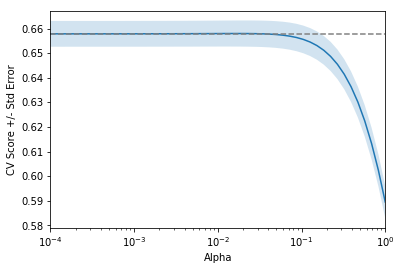

In [25]:
#que remarquez vous par rapport au coefficient alpha ? 
alpha_space=a
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #tracer le score moyen en fonction des alphas
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)
    #faire le plot de l'intervalle [cv_scores-std_error, cv_scores+std_error]
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    #tracer une droite horizontale correspond à la valeur max du score moyen
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    #limiter l'axe des x
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    #mettre l'axe des x en log scale
    ax.set_xscale('log')
    plt.show()

print('On remarque que le score moyen diminue en augmentant alpha')
display_plot(cv_scores, cv_scores_std)